# Normalization and Standardization

# Transformation of Features

why transformation of features are required?

1. Linear Regression---Gradient Descent---GlobalMinima
2. Alogorithms like KNN, k-Means, Hierarchical clustering-- Eucledian Distance.

Every point has some vectors and direction

Deep learning Techniques (standardization, Scaling)
1. ANN----> Global Minima, Gradient 
2. CNN
3. RNN




# Types Of Transformations

1. normalization and standardization.
2. scaling to minimum and maximum values.
3. scaling to median and quantiles.
4. Gaussian Transformation
        (i) Logarithmic Transformation
        (ii) Reciprocal Transformation
        (iii)Square Root Transformation
        (iv) Exponential Transformation
        (v)Box Cox Transformation

# Standardization 

1. We try to bring all the variables or features to a similar scales.
2. Standardization means centering the variable at zero.
3. Formula:- z=(x-x_mean)/STD

In [8]:
import pandas as pd

In [9]:
df = pd.read_csv('train.csv', usecols=['Pclass','Age','Fare','Survived'])

In [10]:
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [11]:
df["Age"].fillna(df.Age.median(),inplace=True)

In [12]:
df.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

In [13]:
### we use the standard scaler from sklearn library

In [14]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler=StandardScaler()
##fit vs fit_transform
####https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html:- Do read this.
df_scaled = scaler.fit_transform(df)
pd.DataFrame(df_scaled)

,0,1,2,3
0,-0.789272,0.827377,-0.565736,-0.502445
1,1.266990,-1.566107,0.663861,0.786845
2,1.266990,0.827377,-0.258337,-0.488854
3,1.266990,-1.566107,0.433312,0.420730
4,-0.789272,0.827377,0.433312,-0.486337
...,...,...,...,...
886,-0.789272,-0.369365,-0.181487,-0.386671
887,1.266990,-1.566107,-0.796286,-0.044381
888,-0.789272,0.827377,-0.104637,-0.176263
889,1.266990,-1.566107,-0.258337,-0.044381


In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([216.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 184.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 491.]),
 array([-1.56610693, -1.44643272, -1.32675851, -1.2070843 , -1.08741009,
        -0.96773588, -0.84806167, -0.72838747, -0.60871326, -0.48903905,
        -0.36936484, -0.24969063, -0.13001642, -0.01034222,  0.10933199,
         0.2290062 ,  0.34868041,  0.46835462,  0.58802883,  0.70770304,
         0.82737724]),
 <a list of 20 Patch objects>)

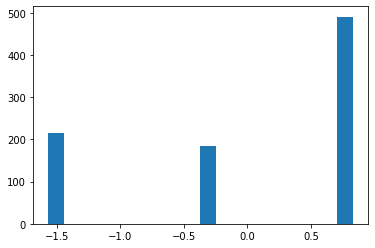

In [24]:
###with respect to Pclass
plt.hist(df_scaled[:,1],bins=20)

(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([-2.22415608, -1.91837055, -1.61258503, -1.3067995 , -1.00101397,
        -0.69522845, -0.38944292, -0.08365739,  0.22212813,  0.52791366,
         0.83369919,  1.13948471,  1.44527024,  1.75105577,  2.05684129,
         2.36262682,  2.66841235,  2.97419787,  3.2799834 ,  3.58576892,
         3.89155445]),
 <a list of 20 Patch objects>)

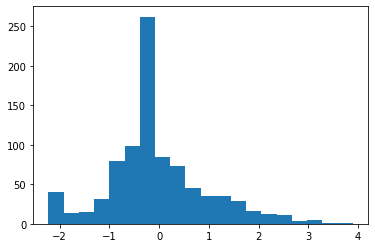

In [25]:
## with respect to Age
plt.hist(df_scaled[:,2],bins=20)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([-0.64842165, -0.13264224,  0.38313716,  0.89891657,  1.41469598,
         1.93047539,  2.4462548 ,  2.96203421,  3.47781362,  3.99359303,
         4.50937244,  5.02515184,  5.54093125,  6.05671066,  6.57249007,
         7.08826948,  7.60404889,  8.1198283 ,  8.63560771,  9.15138712,
         9.66716653]),
 <a list of 20 Patch objects>)

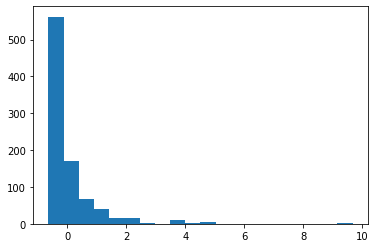

In [28]:
##for fare:- IT has many outliers as the values and the graph is Right skewed
plt.hist(df_scaled[:,3],bins=20)

# Min Max Scaling
1. Min max saclaing transform the values, between 0 to 1.
2. Formula:- (X -X.minimum/(X.max -X.min)
3. Mostly used technique in Deep learning. and mostly used in CNN 

In [36]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
df_minmax = pd.DataFrame(min_max.fit_transform(df),columns=df.columns)

In [37]:
df_minmax.head()

,Survived,Pclass,Age,Fare
0,0.0,1.0,0.271174,0.014151
1,1.0,0.0,0.472229,0.139136
2,1.0,1.0,0.321438,0.015469
3,1.0,0.0,0.434531,0.103644
4,0.0,1.0,0.434531,0.015713


(array([216.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 184.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 491.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

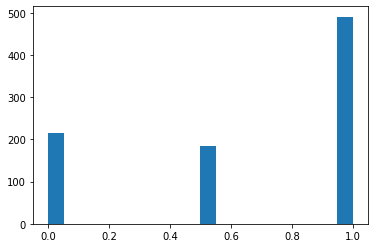

In [39]:
plt.hist(df_minmax['Pclass'],bins=20)

(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

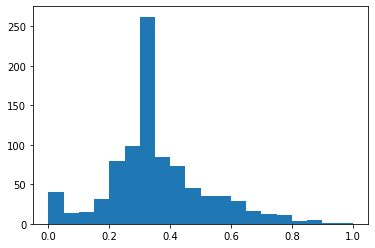

In [40]:
plt.hist(df_minmax['Age'],bins=20)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

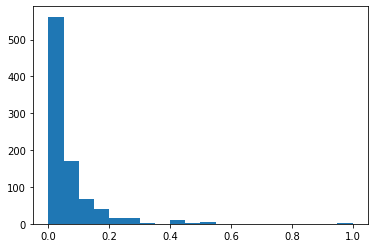

In [41]:
plt.hist(df_minmax['Fare'],bins=20)

# Robust Scaler
1. It is used to scale the feature to median and Quantiles.
2. Sacling using the median and quantiles consists of subtracting the median to all the obeservations, and then dividing by the interquantile differnce between the 75th and 25th quantile:

IQR = 75th quantile- 25th quantile

Formula:- (X - X.median) / IQR

In [43]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df_robust_sacaler = pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df_robust_sacaler.head()

,Survived,Pclass,Age,Fare
0,0.0,0.0,-0.461538,-0.312011
1,1.0,-2.0,0.769231,2.461242
2,1.0,0.0,-0.153846,-0.282777
3,1.0,-2.0,0.538462,1.673732
4,0.0,0.0,0.538462,-0.277363


(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([-2.12153846, -1.81546154, -1.50938462, -1.20330769, -0.89723077,
        -0.59115385, -0.28507692,  0.021     ,  0.32707692,  0.63315385,
         0.93923077,  1.24530769,  1.55138462,  1.85746154,  2.16353846,
         2.46961538,  2.77569231,  3.08176923,  3.38784615,  3.69392308,
         4.        ]),
 <a list of 20 Patch objects>)

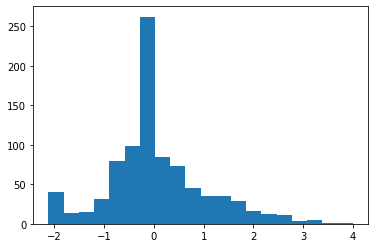

In [44]:
plt.hist(df_robust_sacaler['Age'], bins=20)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([-0.62600478,  0.48343237,  1.59286952,  2.70230667,  3.81174382,
         4.92118096,  6.03061811,  7.14005526,  8.24949241,  9.35892956,
        10.46836671, 11.57780386, 12.68724101, 13.79667816, 14.90611531,
        16.01555246, 17.12498961, 18.23442675, 19.3438639 , 20.45330105,
        21.5627382 ]),
 <a list of 20 Patch objects>)

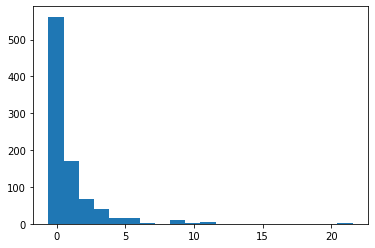

In [45]:
plt.hist(df_robust_sacaler['Fare'], bins=20)

(array([216.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 184.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 491.]),
 array([-2. , -1.9, -1.8, -1.7, -1.6, -1.5, -1.4, -1.3, -1.2, -1.1, -1. ,
        -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ]),
 <a list of 20 Patch objects>)

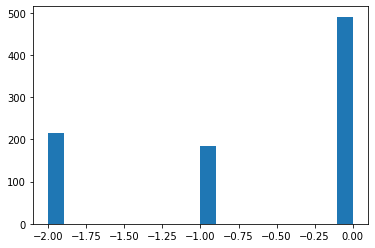

In [46]:
plt.hist(df_robust_sacaler['Pclass'], bins=20)

## Robust is the best scaler and its named robust is due to its work on outliers.
Scale features using statistics that are robust to outliers.

This Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).

Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set. Median and interquartile range are then stored to be used on later data using the transform method.

Standardization of a dataset is a common requirement for many machine learning estimators. Typically this is done by removing the mean and scaling to unit variance. However, outliers can often influence the sample mean / variance in a negative way. In such cases, the median and the interquartile range often give better results.

# Gaussian Transformation

Some Machine Learning Algorithms like linear and logistic assume that the feature are normally distributed.
- Accuracy
- Performance

1.if your distribution is not normally distributed so we can apply some mathematical equation and then convert that in to gaussian Distribution.

Techniques:(i) Logarithmic Transformation
        (ii) Reciprocal Transformation
        (iii)Square Root Transformation
        (iv) Exponential Transformation
        (v)Box Cox Transformation

In [47]:
df = pd.read_csv('train.csv', usecols=['Age','Fare','Survived'])

In [48]:
df.head(10)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
5,0,NaN,8.4583
6,0,54.0,51.8625
7,0,2.0,21.0750
8,1,27.0,11.1333
9,1,14.0,30.0708


In [49]:
###fill nan values

df["Age"]= df['Age'].fillna(df['Age'].median())

In [54]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [56]:
import scipy.stats as stat
import pylab

In [60]:
### if you want to check whether feature is gaussian or normal distributed we will use Q-QPLOT.
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stats.probplot(df[feature],dist='norm', plot=pylab)
    plt.show()
    

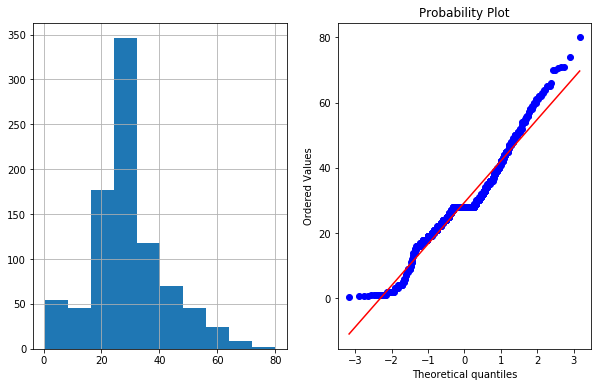

In [61]:
plot_data(df,'Age')

# Logarithmic Transformation

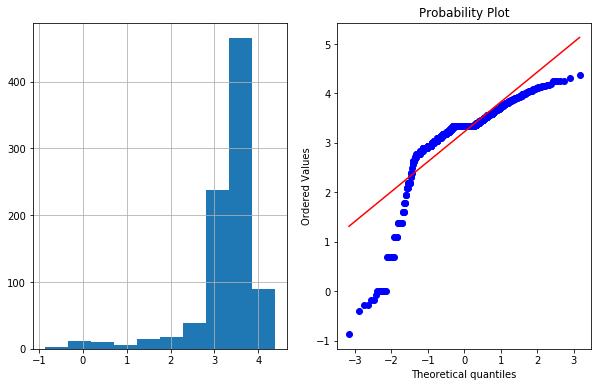

In [62]:
import numpy as np
df['Age_log']=np.log(df['Age'])
plot_data(df,'Age_log')

### so here we can say that logarithmic technique failed. cause the data is imablaced now. we will move on to the next technique

log will work well when  our data is left skewed or right. and so it can convert data in tp gaussian distribution

# Reciprocal Transformation

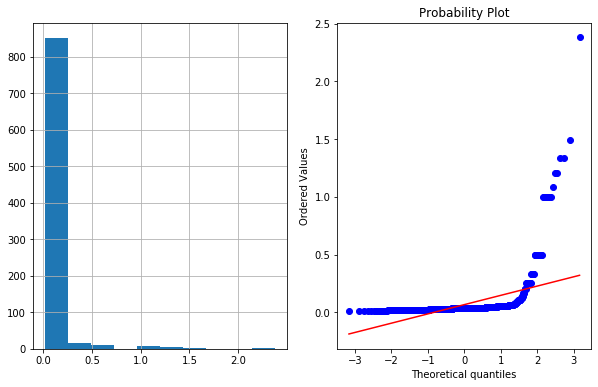

In [65]:
df['Age_reciprocal'] = 1/df.Age
plot_data(df,'Age_reciprocal')

# Square Root Transformation

In [66]:
df['Age_square']=df.Age**(1/2)

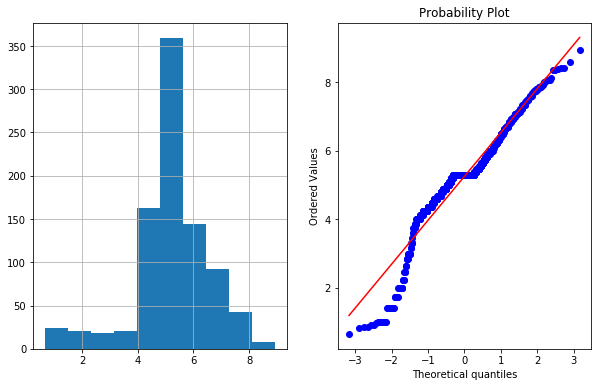

In [67]:
plot_data(df, 'Age_square')

# Exponential Transformation

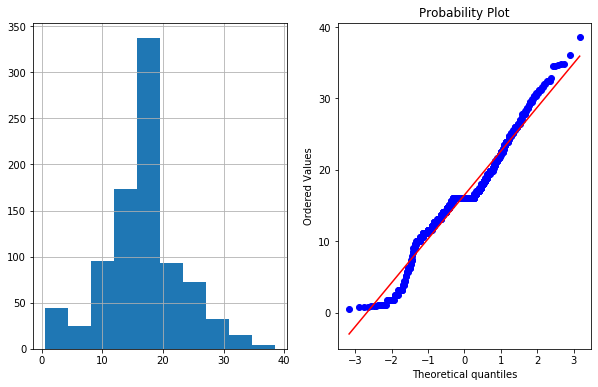

In [70]:
df['Age_exponential']=df.Age**(1/1.2)
plot_data(df,'Age_exponential')

# Box-Cox Transformation

George Box and Sir David Cox collaborated on one paper (Box, 1964). The story is that while Cox was visiting Box at Wisconsin, they decided they should write a paper together because of the similarity of their names (and that both are British). In fact, Professor Box is married to the daughter of Sir Ronald Fisher.

The Box-Cox transformation of the variable x is also indexed by λ.

 Formula:- T(y)=(Y exp(lambda)-1)/lambda

In [72]:
stat.boxcox(df['Age'])

(array([13.468119  , 21.4987284 , 15.56341683, 20.05611014, 20.05611014,
        16.58601436, 28.84746463,  0.92513402, 16.07664335,  9.01695462,
         2.53193075, 30.6104327 , 12.39181078, 21.97437834,  9.01695462,
        29.29062758,  0.92513402, 16.58601436, 18.09258499, 16.58601436,
        20.05611014, 19.56971919,  9.59722218, 16.58601436,  5.32265694,
        21.4987284 , 16.58601436, 11.84551333, 16.58601436, 16.58601436,
        22.44755196, 16.58601436, 16.58601436, 34.06447944, 16.58601436,
        23.38676361, 16.58601436, 12.93257404, 11.29332892,  9.01695462,
        22.44755196, 16.07664335, 16.58601436,  1.75636071, 11.84551333,
        16.58601436, 16.58601436, 16.58601436, 16.58601436, 11.29332892,
         4.65897047, 12.93257404, 26.60575762, 17.09169505, 33.6375945 ,
        16.58601436, 12.93257404, 16.83930618,  3.26857952,  7.221786  ,
        13.468119  , 21.4987284 , 24.77874367,  2.53193075, 16.58601436,
        16.58601436, 17.09169505, 11.84551333, 10.7

In [73]:
df['Age_boxcox'],parameters=stat.boxcox(df['Age'])

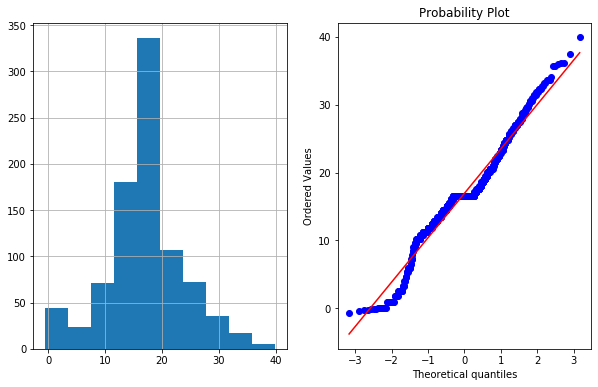

In [74]:
plot_data(df,'Age_boxcox')